In [1]:
import numpy as np 
import numpy.random as rd 
import numpy.linalg as la 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import golden, minimize_scalar
from time import process_time
from HeVMC import *
%matplotlib notebook

## Passing key-word arguments

The core function **evaluate\_energy** has many parameters that can be changed for fine-tuning.\
These are :
- **steps**: the number of steps used during the equilibration run
- **d**    : the half width of the interval of virtual displacements in configuration space. It is observed that **d** is the main source of variation for the acceptance ratio (ratio of approved moves with respect to the total steps made during the metropolis algorithm).
- **method**: if 'bootstrap' is selected, then the Markov Chain is randomly resampled to simulate other runs. The bootstrap procedure produces generally very small width around the best value of the functional.\If 'split' is selected then the chain is split up into sub-chains and the mean energy is evaluated on each chain.
- **samples**: number of bootstrap samples or sub-chains split performed during best energy evaluation.\
This arguments are default set to a good level of approximation.\
However if the user want to fine-tunes this arguments to look for an improved accuracy, thay can be defined as **key-word** arguments within a **dictionary** and passed to the functions **optimize\_He\_ds** or **optimize\_He\_gss**

In [ ]:
#example of use key-word arguments with dictionaries
if __name__ == '__main__':
    
    #Creating Helium instance
    He = Helium(Z=1.9, b=0.,
               interacting=False, jastrow=True, numeric=False)
    
    Z_vals = np.linspace(1.5,2.5,3)
    b_vals = np.zeros(len(Z_vals))
    
    #Defining dictionary of values
    args = {
        'steps':10000,
        'd' : 0.75,
        'method' : 'bootstrap',
        'samples' : 100,
     }
    
    
    #explicit passage with **
    _, _, _ = evaluate_energy(He.weight, He.EL, He.coords, talky=True,**args)
    
    #these function already implement arguments passage (if arguments are passed of course ;) )
    b_energy, b_params, energies, errs = optimize_He_ds(Z_vals, b_vals, He, info=True, energy_args=args)
    
    Z_interval = (1.8,2.2)
    best_b, _ = optimize_He_gss(He, 'z', Z_interval, info=False, display=True, energy_args=args)

In [ ]:
_

### Correct working of Helium class

This series of examples is thought to understand if Helium class instances are working fine or not.\
As you may notice differences between the numeric laplacian implementation and the analytic formula implementation differ around the 6<sup>th</sup> or 7<sup>th</sup> decimal digit.

In [ ]:
coords = np.empty((1,6))
coords[0,:] = [0.,0.,0.1,-0.,-0.2,0.]
r1_v = coords[0,:3]
r2_v = coords[0,3:]
r1 = la.norm(r1_v)
r2 = la.norm(r2_v)
Z = 1.5
He = Helium(Z=Z, b=0., coords = coords,
            interacting=False, jastrow=False,
            numeric=True)
print('Potential')
print('Analytic : %10.8f' % (-2*(1./r1 + 1./r2)))
print('Numeric  : %10.8f' % He.V(coords))
print('*******************\nWave Function')
print('Analytic : %10.8f' % (np.exp(-Z*r1)*np.exp(-Z*r2)))
print('Numeric  : %10.8f' % He.WF(coords[0,:]))
print('*******************\nWeight')
print('Analytic : %16.15f' % (np.exp(-Z*r1)*np.exp(-Z*r2))**2.)
print('Numeric  : %16.15f' % He.weight(coords[0,:]) )
print('*******************\nLocal Energy')
print('Analytic : %10.8f' % (-Z**2. + (Z-2.)*(1./r1 + 1./r2)))
print('Numeric  : %10.8f' % He.EL(coords))
print('')

In [ ]:
coords = np.empty((1,6))
coords[0,:] = [1,1.,1.,-1.,-4.,-1.]
r1_v = coords[0,:3]
r2_v = coords[0,3:]
r12_v = r1_v - r2_v
r1 = la.norm(r1_v)
r2 = la.norm(r2_v)
r12 = la.norm(r12_v)
Z = 1.5
He = Helium(Z=Z, b=0., coords = coords,
            interacting=True, jastrow=False,
            numeric=True)
print('Potential')
print('Analytic : %10.8f' % (-2*(1./r1 + 1./r2) + 1./r12))
print('Numeric  : %10.8f' % He.V(coords))
print('*******************\nWave Function')
print('Analytic : %10.8f' % (np.exp(-Z*r1)*np.exp(-Z*r2)))
print('Numeric  : %10.8f' % He.WF(coords[0,:]))
print('*******************\nWeight')
print('Analytic : %16.15f' % (np.exp(-Z*r1)*np.exp(-Z*r2))**2.)
print('Numeric  : %16.15f' % He.weight(coords[0,:]) )
print('*******************\nLocal Energy')
print('Analytic : %10.8f' % ( -Z**2. + (Z-2.)*(1./r1 + 1./r2) + 1./r12 ))
print('Numeric  : %10.8f' % He.EL(coords))
print('')

In [ ]:
coords = np.empty((1,6))
coords[0,:] = [1,1.,1.,-1.,-4.,-1.]
r1_v = coords[0,:3]
r2_v = coords[0,3:]
r12_v = r1_v - r2_v
r1 = la.norm(r1_v)
r2 = la.norm(r2_v)
r12 = la.norm(r12_v)
Z = 2.
b = 0.3
He = Helium(Z=Z, b=b, coords = coords,
            interacting=True, jastrow=True,
            numeric=True)
print('Potential')
print('Analytic : %10.8f' % (-2*(1./r1 + 1./r2) + 1./r12))
print('Numeric  : %10.8f' % He.V(coords))
print('*******************\nWave Function')
pj = set_pade_jastrow(b)
print('Analytic : %10.8f' % pj(coords[0,:]) )
print('Numeric  : %10.8f' % He.WF(coords[0,:]) )
print('*******************\nWeight')
print('Analytic : %16.15f' % (pj(coords[0,:])**2.) )
print('Numeric  : %16.15f' % He.weight(coords[0,:]) )
print('*******************\nLocal Energy')
el = set_loc_en_pj(b,True)
print('Analytic : %10.8f' % ( el(coords)) )
print('Numeric  : %10.8f' % He.EL(coords) )
print('')

### Confrontation of numeric energy with analytic energy

In this section it is shown how much the computation can vary if the local energy is computed through a numerical implementation (numeric calculation of the Laplacian) or through an anlytical one.\
Whenever possible analytical implementation should always be preferred as it ensures best accuracy and smaller computational costs.\
I suggest to play a bit with the parameters to see all possible configurations.
 
> Try this one : 

    Z = 2.
    b = 0. 
    interacting = False
    jastrow = False
You should be able to see the fluctuations introduced by the laplacian

In [ ]:
if __name__ == '__main__':
    steps = 10000
    
    #defining Helium parameters
    p0 = [1.,1.,1.,-1.,-1.,-1.]
    Z = 2.
    b = 0.
    
    He_params = {
        'Z' : Z,
        'b' : b,
        'coords' : p0,
        'interacting' : True,
        'jastrow' : True
    }
    
    #creating Helium instance
    He = Helium(**He_params)
    
    #creating Markov Chain instance
    r6 = MarkovChain(He.coords, He.weight, d=0.75)
    r6.set_chain(steps=steps)
    r6.evolve_chain(save=True)
    r6.evolve_chain()
    
    #Evaluate EL numerically and analitically
    EL_num = He.EL(r6.chain)
    He = Helium(**He_params)
    EL_an  = He.EL(r6.chain)
    
    
    #graphics
    fig, ax = plt.subplots(2,1)
    plt.subplots_adjust(hspace=0.5)
    x1 = np.percentile(EL_num,[2.5,97.5])
    x2 = np.percentile(EL_an ,[2.5,97.5])
    _ = ax[0].set_xlim(min(x1[0],x2[0]) - 0.05, max(x1[1],x2[1]) + 0.05)
    
    #Local Energy histogram
    _ = ax[0].set_title('Local Energy distribution')
    _ = ax[0].set_xlabel(r'$E$')
    _ = ax[0].set_ylabel(r'$P(E)$')
    _ = ax[0].hist(EL_num, bins=200, density=True, alpha=0.5, label='Numeric')
    _ = ax[0].hist(EL_an , bins=200, density=True, alpha=0.5, label='Analytic')
    _ = ax[0].axvline(x=np.mean(EL_num), alpha=0.8,label=r'$E_{num} = %5.4f$' % np.mean(EL_num), c='b')
    _ = ax[0].axvline(x=np.mean(EL_an), alpha=0.8,label=r'$E_{an} = %5.4f$' % np.mean(EL_an), c='r')
    
    
    n = len(r6.chain)
    #Local Energy run average
    _ = ax[1].set_title('Local Energy Evolution during run')
    _ = ax[1].set_xlabel(r'$\tau$')
    _ = ax[1].set_ylabel(r'$E$')
    _ = ax[1].plot(range(n), EL_num, alpha=0.5, label='Numeric', c='b')
    _ = ax[1].plot(range(n), EL_an, alpha=0.5, label='Analytic', c='r')
    _ = ax[1].axhline(y=np.mean(EL_num), alpha=0.8,label=r'$E_{num} = %5.4f$' % np.mean(EL_num), c='b')
    _ = ax[1].axhline(y=np.mean(EL_an), alpha=0.8,label=r'$E_{an} = %5.4f$' % np.mean(EL_an), c='r')
    ax[0].legend()
    ax[1].legend()
    plt.show()

## Helium Ground State

The function **evaluate\_energy** computes the energy functional given a proper weight function and a local energy function.\
In this implementation the Helium class contains all the information needed.\
The function `evaluate_energy` is the **core function** of the project and compute the energy functional.\
Notice however that it is not strictly linked to an helium instance : it works with any weight function and with any Local energy function as long as they are well defined on the given coordinates.

To play a bit with this function I suggest change the method argument to 'split' and see what happens to the 95% Confidence Interval.

In [ ]:
## evaluate_energy test 
if __name__ == '__main__':
    # Variational parameters 
    Z = 2.
    b = 0.3 
    p0 = [1.,1.,1., -1.,-1.,-1.]
    
    #creating Helium instance 
    He = Helium(Z,b,interacting=True, jastrow=False, numeric=False)
    
    #Evaluating energy functional 
    tic = process_time()
    E_m ,_ , _ =  evaluate_energy(He.weight, He.EL, talky=True, steps=10000,
                                  method='bootstrap')
    toc = process_time()
    
    print('Time for Energy functional : %7.5f' % (toc-tic))
    print('Energy functional value    : %7.5f' % E_m)
    

#### - Direct Search Search in Parameter Space

This section shows how to perform a direct search in parameter space.\
You should pass two arrays of equal length : one for **Z** value and one for **b**s.\
Notice that, as the Helium contains all the necessary informations, the same function works with any combination of **interacting** and **jastrow** parameters.

In [ ]:
## test 
if __name__ == '__main__':
    #creating Helium instance 
    b = np.linspace(0., 1.1,11)
    Z = np.full(len(b),2.)
    p0 = [1.,1.,1.,-1.,-1.,-1.]
    He = Helium(Z[0],b[0],p0, interacting=True, jastrow=True,
                              numeric = False)
    
    best_params, best_energy, ens, errs = optimize_He_ds(Z, b, He, info=True)
    

In [ ]:
#this is the graphic section, but it works only if you have changed b values :P
print(best_params)
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.5)
ax[0].set_xlabel('b')
ax[0].set_ylabel(r'$E[\psi]$')
ax[0].errorbar(b, ens, errs, marker='o')
#ax[1].set_yscale('log')
ax[1].set_xlabel('b')
ax[1].set_ylabel('Err')
ax[1].plot(b,errs, marker='.',lw=0.75)
ax[0].axvline(x=best_params[1], c='r', lw=0.5)
ax[1].axvline(x=best_params[1], c='r', lw=0.5)
plt.show()

#### - Golden Section Search in parameter space

Golden section search is defined for 1D functions. In order to proceed a 1D functions is defined, distinguishing situations where Z varies or those were b varies with a character (either 'b' or 'Z').\
In this implementation the function scipy.optimize.minimize_scalar works behind the curtains.\
You may also be strict on tolerance (maybe not `1e-16`), the function should do well in about 4-5 minutes.

In [ ]:
#Golden Section Search 
if __name__ == '__main__':
    # varying Z 
    # non interacting 
    # no Padé-Jastrow
    from time import process_time
    
    b_interval = (0.,1.)
    p0 = [1.,1.,1.,-1.,-1.,-1.]
    He = Helium(Z=2., b=0., coords=p0, 
                interacting=True, jastrow=True,
                numeric=False)
    
    tic = process_time()
    param_min, info_ogj = optimize_He_gss(He,'b',b_interval,
                               info=True, tol=1e-4, display=True)
    toc = process_time()
    
    print('Optimal param is %5.4f' % param_min)
    print('Time spent (s) ', toc - tic)

In [ ]:
#After the program has finished try looking into this
print(info_ogj)

## Showing local energy 

Local energy is saved on a text file and its running average is showed as a function of the number of steps in metropolis algorithm.

In [8]:
if __name__ == '__main__':
    #creating Helium instance
    Z = 2.
    b = 0.2
    p0 = np.array([1.,1.,1.,-1.,-1.,-1.])
    He = Helium(Z, b, numeric=False)  
    steps=10000
    
    #definig Markov chain
    r6 = MarkovChain(init_point=p0, prob_dist = He.weight, d = 1.6) #Markov Chain instance
    r6.set_chain(steps)              
    r6.evolve_chain(save=True)
    r6.evolve_chain()
    
    #evaluate energies
    energies = He.EL(r6.chain)
    
    
    out = open('Output/chain.txt', 'w')
    step = 10
    out.write('     tau         EL         x1         y1         z1         x2         y2         z2\n')
    for i in range(0,len(energies[1:]),step):
        coords = r6.chain[i]
        out.write('%8d %10.5f %10.5f %10.5f %10.5f %10.5f %10.5f %10.5f \n' 
                  % (i, energies[i], coords[0], coords[1], coords[2],
                     coords[3], coords[4], coords[5]) )
    out.close()

<IPython.core.display.Javascript object>


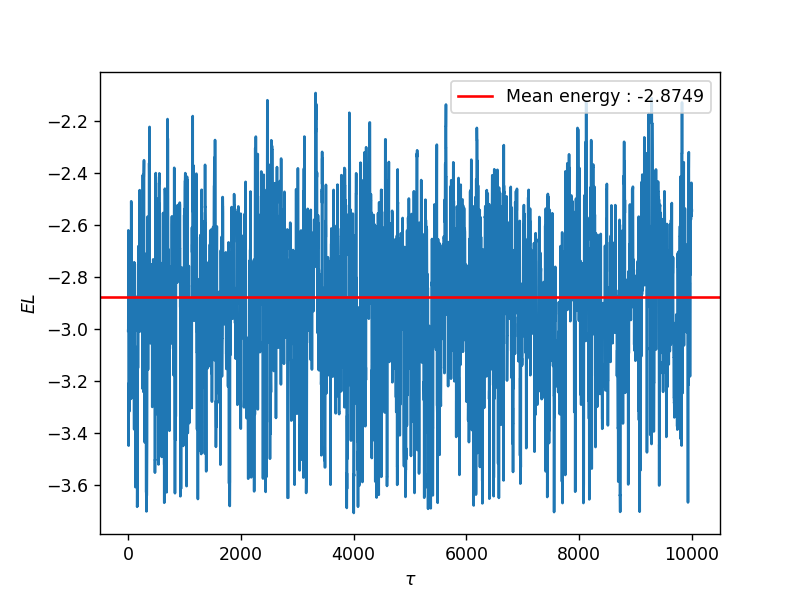

In [9]:
#graphics 
fig, ax = plt.subplots()
_ = ax.set_xlabel(r'$\tau$')
_ = ax.set_ylabel(r'$EL$')
_ = ax.plot(range(len(energies)), energies)
_ = ax.axhline(y = np.mean(energies), c='r', label='Mean energy : %5.4f' % np.mean(energies))
_ = ax.legend()
plt.show()

### Local energy varying number of steps

In [11]:
if __name__ == '__main__':
    #creating Helium instance
    Z = 2.
    b = 0.2
    p0 = np.array([1.,1.,1.,-1.,-1.,-1.])
    He = Helium(Z, b, interacting=True, jastrow=True, numeric=False)                              
    
    #yep, this may take a while ...
    # ... a very very long while ...
    #samples = [1000, 5000, 10000, 20000, 50000, 80000, 100000, 200000, 500000, 800000, 1000000]
    samples = [100,1000,10000,100000]
    n_samples = len(samples)
    
    mean_energies = np.empty(n_samples)
    errors = np.empty(n_samples)
    
    for i in range(n_samples):
        #definig Markov chain
        mean_energies[i], errors[i], _ = evaluate_energy(He.weight, He.EL, He.coords, steps=samples[i])

<IPython.core.display.Javascript object>


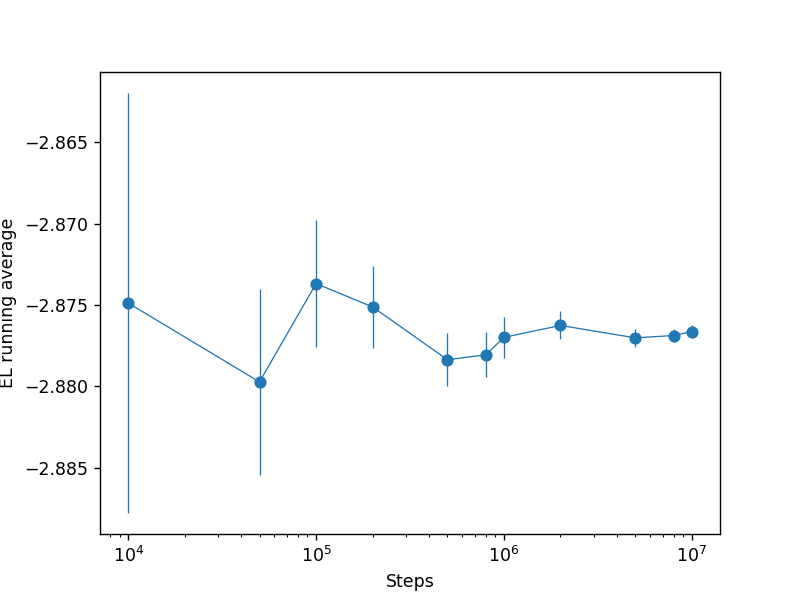

In [13]:
#graphics 

plt.close('all')
fig, ax = plt.subplots()

_ = ax.set_xlabel('Steps')
_ = ax.set_ylabel('EL running average')
_ = ax.set_xscale('log')
_ = ax.errorbar(np.array(samples)*10, mean_energies,errors, marker='o', lw=0.75)

### EL histogram and WF scatter plot

<IPython.core.display.Javascript object>


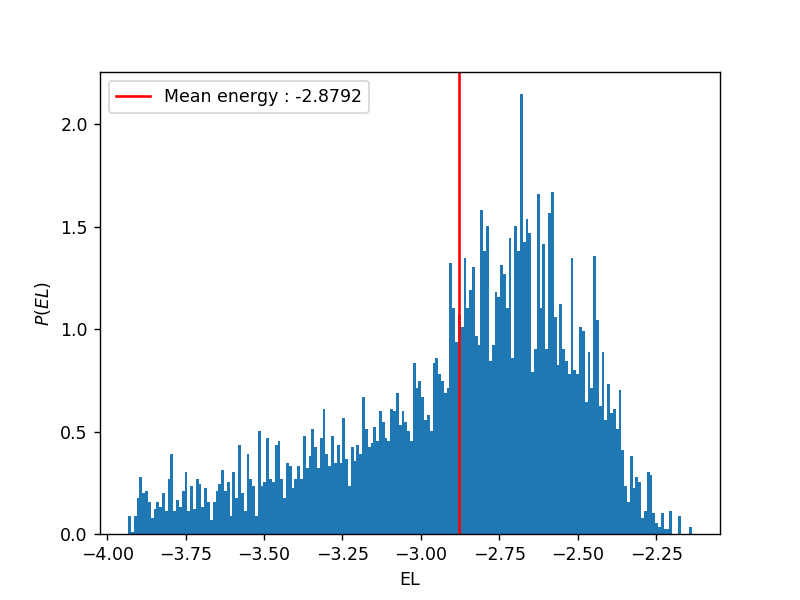

In [10]:
if __name__ == '__main__':
    #creating Helium instance
    Z = 2.
    b = 0.1
    p0 = np.array([1.,1.,1.,-1.,-1.,-1.])
    He = Helium(Z, b, interacting=True, jastrow=True, numeric=False)                               
    
    #definig Markov chain
    r6 = MarkovChain(init_point=p0, prob_dist = He.weight, d = 1.6) #Markov Chain instance
    r6.set_chain(steps=100000)              
    r6.evolve_chain(save=True)
    r6.set_chain(10000)
    r6.evolve_chain()
    
    #evalua
    energies = He.EL(r6.chain)
    
    fig, ax = plt.subplots()
    
    _ = ax.set_xlabel('EL')
    _ = ax.set_ylabel(r'$P(EL)$')
    _ = ax.hist(energies, bins=200, density=True)
    _ = ax.axvline(x = np.mean(energies), color='r', label = 'Mean energy : %5.4f' % np.mean(energies))
    _ = ax.legend()
    

<IPython.core.display.Javascript object>


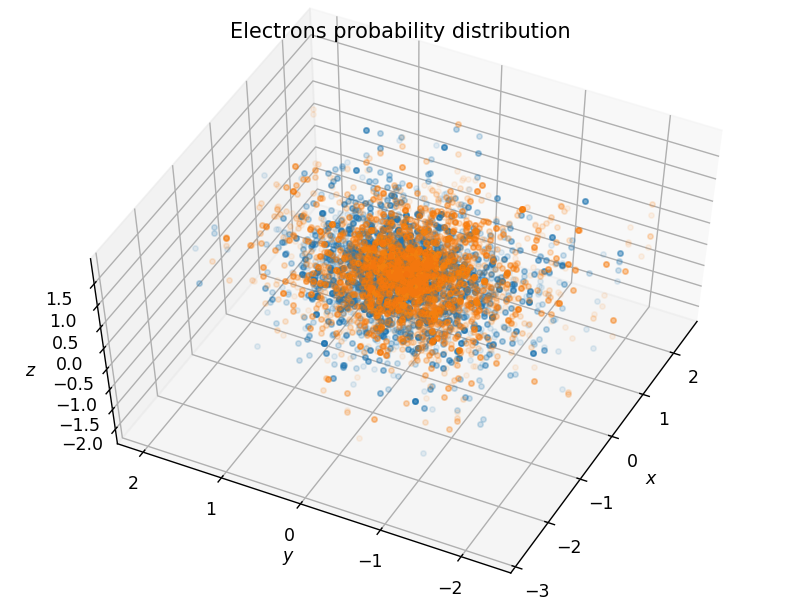

In [13]:
#3D graphics
fig = plt.figure()
#ax = fig.add_subplot(projection = '3d')
ax1 = Axes3D(fig)

x1 = r6.chain[:,0]
y1 = r6.chain[:,1]
z1 = r6.chain[:,2]

x2 = r6.chain[:,3]
y2 = r6.chain[:,4]
z2 = r6.chain[:,5]

_ = ax1.set_title('Electrons probability distribution')
_ = ax1.set_xlabel(r'$x$')
_ = ax1.set_ylabel(r'$y$')
_ = ax1.set_zlabel(r'$z$')
_ = ax1.plot([0.],[0.],[0.], marker='.', color='r')
_ = ax1.plot(x1, y1, z1, marker='.', linestyle='none', alpha=0.1)
_ = ax1.plot(x2, y2, z2, marker='.', linestyle='none', alpha=0.08)

### Parameters extimation for VMC

As the energy functional is subjected to a lot of fluctuations I tried reusing the direct search and golden section search algorithms looking for emergent patterns.\
This takes approximately $\tau \simeq 800 (s)$.

In [12]:
if __name__ == '__main__':
    
    b_values = np.linspace(0.,1.,11)
    Z_values = np.full(len(b_values),2.)
    
    He = Helium(Z = 2., b=0.)
    
    n_vals = 10
    energies = np.empty((n_vals,len(b_values))) 
    errors = np.empty((n_vals,len(b_values)))
    
    tic = process_time()
    for i in range(n_vals):
        _, _, energies[i,:], errors[i,:] = optimize_He_ds(Z_values, b_values, He, info=True)
    toc = process_time()
    print('Overall time : %7.5f' % (toc-tic) )
        

Steps : 100000
Acceptance ratio   : 0.571800
Average Energy     : -2.854016692
95 % C.I.         :  [-2.85706951 -2.8509259 ]
Standard deviation : 0.001572461
Equilibration time : 0.28125
Actual run time    : 2.68750
Energy calc time   : 2.67188
Statistics time     : 1.42188
************************************************
Steps : 100000
Acceptance ratio   : 0.556110
Average Energy     : -2.879833420
95 % C.I.         :  [-2.88211634 -2.87755462]
Standard deviation : 0.001155754
Equilibration time : 0.31250
Actual run time    : 2.81250
Energy calc time   : 2.87500
Statistics time     : 1.42188
************************************************
Steps : 100000
Acceptance ratio   : 0.542640
Average Energy     : -2.879465894
95 % C.I.         :  [-2.88127365 -2.87763481]
Standard deviation : 0.000968219
Equilibration time : 0.28125
Actual run time    : 2.68750
Energy calc time   : 2.93750
Statistics time     : 1.45312
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.532250
Average Energy     : -2.851443340
95 % C.I.         :  [-2.85322549 -2.84969224]
Standard deviation : 0.000894133
Equilibration time : 0.28125
Actual run time    : 2.73438
Energy calc time   : 2.79688
Statistics time     : 1.40625
************************************************
Steps : 100000
Acceptance ratio   : 0.531730
Average Energy     : -2.858185182
95 % C.I.         :  [-2.86004474 -2.85634935]
Standard deviation : 0.000954308
Equilibration time : 0.26562
Actual run time    : 2.73438
Energy calc time   : 2.76562
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance ratio   : 0.527300
Average Energy     : -2.853526075
95 % C.I.         :  [-2.85540984 -2.85150595]
Standard deviation : 0.001016017
Equilibration time : 0.28125
Actual run time    : 2.71875
Energy calc time   : 2.76562
Statistics time     : 1.48438
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.521340
Average Energy     : -2.836003994
95 % C.I.         :  [-2.83849289 -2.83362251]
Standard deviation : 0.001277848
Equilibration time : 0.26562
Actual run time    : 2.75000
Energy calc time   : 2.73438
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance ratio   : 0.525720
Average Energy     : -2.841609840
95 % C.I.         :  [-2.84405205 -2.839074  ]
Standard deviation : 0.001295082
Equilibration time : 0.29688
Actual run time    : 2.68750
Energy calc time   : 2.71875
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance ratio   : 0.523460
Average Energy     : -2.832393243
95 % C.I.         :  [-2.83487023 -2.82972852]
Standard deviation : 0.001329815
Equilibration time : 0.29688
Actual run time    : 2.68750
Energy calc time   : 2.70312
Statistics time     : 1.40625
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.551460
Average Energy     : -2.876374363
95 % C.I.         :  [-2.87858123 -2.87422219]
Standard deviation : 0.001135725
Equilibration time : 0.26562
Actual run time    : 2.85938
Energy calc time   : 2.73438
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance ratio   : 0.542040
Average Energy     : -2.873362524
95 % C.I.         :  [-2.87530877 -2.87133284]
Standard deviation : 0.000988062
Equilibration time : 0.25000
Actual run time    : 2.68750
Energy calc time   : 2.70312
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance ratio   : 0.538790
Average Energy     : -2.871970962
95 % C.I.         :  [-2.87376766 -2.87022255]
Standard deviation : 0.000927585
Equilibration time : 0.26562
Actual run time    : 2.67188
Energy calc time   : 2.67188
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.531770
Average Energy     : -2.857877105
95 % C.I.         :  [-2.8598098  -2.85588827]
Standard deviation : 0.000986426
Equilibration time : 0.29688
Actual run time    : 2.71875
Energy calc time   : 2.78125
Statistics time     : 1.40625
************************************************
Steps : 100000
Acceptance ratio   : 0.528170
Average Energy     : -2.847101332
95 % C.I.         :  [-2.84914075 -2.84503721]
Standard deviation : 0.001055162
Equilibration time : 0.25000
Actual run time    : 2.68750
Energy calc time   : 2.75000
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance ratio   : 0.529340
Average Energy     : -2.849207916
95 % C.I.         :  [-2.85137702 -2.84694572]
Standard deviation : 0.001133861
Equilibration time : 0.26562
Actual run time    : 2.68750
Energy calc time   : 2.68750
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance

<IPython.core.display.Javascript object>


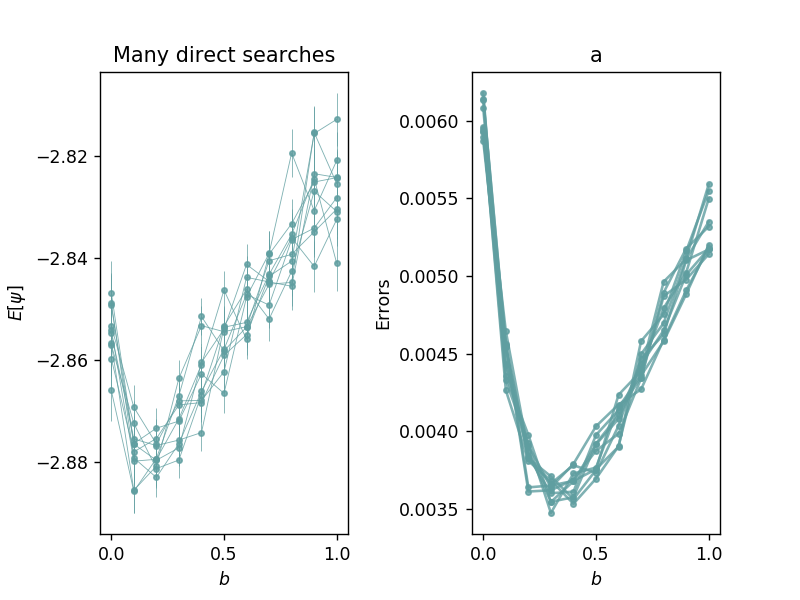

In [25]:
plt.close('all')
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.5)

plt.title('a')
_ = ax[0].set_title('Many direct searches')
_ = ax[0].set_xlabel(r'$b$')
_ = ax[0].set_ylabel(r'$E[\psi]$')
for i in range(len(energies)):
    _ = ax[0].errorbar(b_values, energies[i,:], -errors[i,:],
                     marker='.', lw=0.5, c='cadetblue', alpha=0.8)

_ = ax[1].set_xlabel(r'$b$')
_ = ax[1].set_ylabel('Errors')
for i in range(len(energies)):
    _ = ax[1].plot(b_values, -errors[i,:], marker='.', alpha=0.8, c='cadetblue')
fig.savefig('Ds_pattern.png')

Many direct search runs allow to effectively observe a pattern followed by the energy functional.\
The minimum for the general case (interacting potential and padé-jastrow approximant) lies between the region [0,0.5] of $b$ values and fixed $Z=2$.

Once a good interval has been found we may proceed applying the golden section search to that interval many times and giving as a result the average of the values found and the standard deviation around the average.\
This other part is much more expensive and costs around $\tau \simeq 1200 s$.

In [26]:
if __name__ == '__main__':
    
    Z = 2.
    b = 0. 
    b_interval=(0.,0.5)
    
    He = Helium(Z,b)
    
    n_runs = 10
    bs_best = np.empty(n_runs)
    tic = process_time()
    for i in range(n_runs):
        bs_best[i], _ = optimize_He_gss(He, 'b', b_interval,
                                       info=True)
    toc = process_time()
    print('Overall time : %7.5f' % (toc-tic))

Steps : 100000
Acceptance ratio   : 0.546110
Average Energy     : -2.879743256
95 % C.I.         :  [-2.88164653 -2.87779114]
Standard deviation : 0.000972688
Equilibration time : 0.31250
Actual run time    : 3.20312
Energy calc time   : 2.98438
Statistics time     : 1.40625
************************************************
Steps : 100000
Acceptance ratio   : 0.540930
Average Energy     : -2.877331440
95 % C.I.         :  [-2.87913155 -2.87551253]
Standard deviation : 0.000911075
Equilibration time : 0.28125
Actual run time    : 2.85938
Energy calc time   : 2.93750
Statistics time     : 1.46875
************************************************
Steps : 100000
Acceptance ratio   : 0.553580
Average Energy     : -2.875377939
95 % C.I.         :  [-2.87755707 -2.87324425]
Standard deviation : 0.001107334
Equilibration time : 0.29688
Actual run time    : 2.85938
Energy calc time   : 2.89062
Statistics time     : 1.56250
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.536790
Average Energy     : -2.873877720
95 % C.I.         :  [-2.87566276 -2.87219703]
Standard deviation : 0.000933452
Equilibration time : 0.28125
Actual run time    : 2.75000
Energy calc time   : 2.84375
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance ratio   : 0.539540
Average Energy     : -2.867182628
95 % C.I.         :  [-2.86897241 -2.86544432]
Standard deviation : 0.000922346
Equilibration time : 0.28125
Actual run time    : 2.82812
Energy calc time   : 2.82812
Statistics time     : 1.46875
************************************************
Steps : 100000
Acceptance ratio   : 0.539500
Average Energy     : -2.871751915
95 % C.I.         :  [-2.87343213 -2.86991943]
Standard deviation : 0.000897078
Equilibration time : 0.28125
Actual run time    : 2.82812
Energy calc time   : 2.92188
Statistics time     : 1.35938
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.548160
Average Energy     : -2.877319935
95 % C.I.         :  [-2.87928312 -2.87552038]
Standard deviation : 0.000986586
Equilibration time : 0.28125
Actual run time    : 2.71875
Energy calc time   : 2.76562
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance ratio   : 0.547930
Average Energy     : -2.872662228
95 % C.I.         :  [-2.87459038 -2.87073177]
Standard deviation : 0.001030316
Equilibration time : 0.26562
Actual run time    : 2.71875
Energy calc time   : 2.79688
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance ratio   : 0.548350
Average Energy     : -2.880069965
95 % C.I.         :  [-2.88205015 -2.87799557]
Standard deviation : 0.001030305
Equilibration time : 0.25000
Actual run time    : 2.67188
Energy calc time   : 2.75000
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.551060
Average Energy     : -2.874305192
95 % C.I.         :  [-2.87656811 -2.87230972]
Standard deviation : 0.001051780
Equilibration time : 0.28125
Actual run time    : 2.68750
Energy calc time   : 2.76562
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance ratio   : 0.554880
Average Energy     : -2.882960510
95 % C.I.         :  [-2.88529688 -2.8806489 ]
Standard deviation : 0.001181609
Equilibration time : 0.29688
Actual run time    : 2.67188
Energy calc time   : 2.70312
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance ratio   : 0.551520
Average Energy     : -2.877896469
95 % C.I.         :  [-2.88001786 -2.87575072]
Standard deviation : 0.001085915
Equilibration time : 0.28125
Actual run time    : 2.70312
Energy calc time   : 2.75000
Statistics time     : 1.35938
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.552180
Average Energy     : -2.878307085
95 % C.I.         :  [-2.88040651 -2.87617092]
Standard deviation : 0.001085910
Equilibration time : 0.26562
Actual run time    : 2.71875
Energy calc time   : 2.71875
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance ratio   : 0.549880
Average Energy     : -2.883856815
95 % C.I.         :  [-2.88589048 -2.88177383]
Standard deviation : 0.001089836
Equilibration time : 0.26562
Actual run time    : 2.71875
Energy calc time   : 2.70312
Statistics time     : 1.35938
************************************************
Steps : 100000
Acceptance ratio   : 0.552820
Average Energy     : -2.875410206
95 % C.I.         :  [-2.8774837  -2.87335225]
Standard deviation : 0.001056611
Equilibration time : 0.28125
Actual run time    : 2.68750
Energy calc time   : 2.70312
Statistics time     : 1.35938
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.543620
Average Energy     : -2.875827691
95 % C.I.         :  [-2.87762425 -2.87395757]
Standard deviation : 0.000965466
Equilibration time : 0.29688
Actual run time    : 2.71875
Energy calc time   : 2.81250
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance ratio   : 0.546020
Average Energy     : -2.877332284
95 % C.I.         :  [-2.87937485 -2.87532712]
Standard deviation : 0.001025441
Equilibration time : 0.26562
Actual run time    : 2.71875
Energy calc time   : 2.76562
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance ratio   : 0.547630
Average Energy     : -2.875689434
95 % C.I.         :  [-2.87760243 -2.87374219]
Standard deviation : 0.000982014
Equilibration time : 0.28125
Actual run time    : 2.71875
Energy calc time   : 2.75000
Statistics time     : 1.37500
************************************************
Steps : 100000
Acceptance

Steps : 100000
Acceptance ratio   : 0.547360
Average Energy     : -2.870127545
95 % C.I.         :  [-2.8718755  -2.86821822]
Standard deviation : 0.000971723
Equilibration time : 0.28125
Actual run time    : 2.73438
Energy calc time   : 2.75000
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance ratio   : 0.540690
Average Energy     : -2.870132379
95 % C.I.         :  [-2.8719165  -2.86844955]
Standard deviation : 0.000907516
Equilibration time : 0.26562
Actual run time    : 2.70312
Energy calc time   : 2.71875
Statistics time     : 1.39062
************************************************
Steps : 100000
Acceptance ratio   : 0.536770
Average Energy     : -2.863581999
95 % C.I.         :  [-2.86550342 -2.86178783]
Standard deviation : 0.000928675
Equilibration time : 0.26562
Actual run time    : 2.81250
Energy calc time   : 3.21875
Statistics time     : 2.39062
************************************************
Steps : 100000
Acceptance

<IPython.core.display.Javascript object>


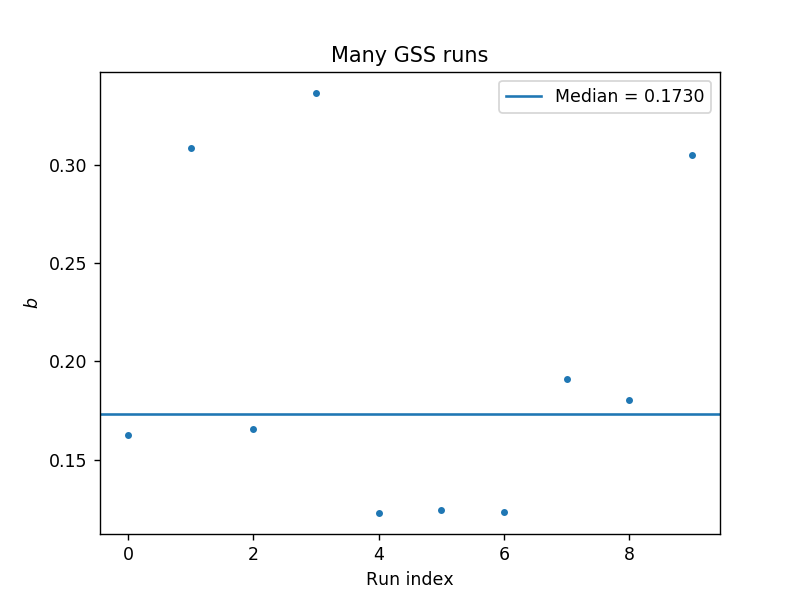

[0.16239564 0.30901699 0.1656033  0.33688104 0.12273332 0.12426761
 0.12307222 0.19098301 0.18033989 0.30541156]


In [45]:
fig_b, ax_b = plt.subplots()

print(bs_best)
b_med = np.median(bs_best)
#(b_low, b_up) = np.percentile(bs_best,[2.5,97.5])

_ = ax_b.set_title('Many GSS runs')
_ = ax_b.set_xlabel('Run index')
_ = ax_b.set_ylabel(r'$b$')
_ = ax_b.plot(range(len(bs_best)), bs_best, marker='.', linestyle='none')
_ = ax_b.axhline(y = b_med, label = 'Median = %6.4f' % b_med)
#_ = ax_b.fill_between(range(len(bs_best)),y1 = b_up,
                      #y2 = b_low, alpha=0.35)
_ = ax_b.legend()
fig_b.savefig('b_values_distribution.png')